# Phase 3: Clustering & Segmentation



**Objective**: Group similar apps together to identify patterns.

**Why is this important?**
Clustering helps in market segmentation. For example, we might find a cluster of "High Quality, Paid Games" vs "Low Quality, Free Tools".
We will use **K-Means Clustering**, a popular unsupervised learning algorithm.

**Steps**:
1.  **Preprocessing**: Select features and scale them (K-Means is sensitive to scale).
2.  **Elbow Method**: Determine the optimal number of clusters (K).
3.  **Clustering**: Apply K-Means.
4.  **Analysis**: Interpret the clusters.
    


## 1. Import Libraries & Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

def get_data_path(filename):
    possible_paths = [
        f"../output/{filename}",
        f"output/{filename}",
        f"/Users/jatinbisen/Desktop/Data_mining/output/{filename}"
    ]
    for path in possible_paths:
        if os.path.exists(path):
            return path
    return None

# Load cleaned data
google_df = pd.read_csv(get_data_path('google_cleaned.csv'))
print("Data loaded.")


Data loaded.


## 2. Preprocessing



We will cluster based on numerical features: `Rating`, `Reviews`, `Size`, `Price`.
We need to handle missing values (if any remain) and scale the data.
    


In [2]:
# Select features
features = ['Rating', 'Reviews', 'Size', 'Price']
data_for_clustering = google_df[features].dropna()

# Log transform 'Reviews' and 'Size' because they are highly skewed
data_for_clustering['Reviews_Log'] = np.log1p(data_for_clustering['Reviews'])
data_for_clustering['Size_Log'] = np.log1p(data_for_clustering['Size'])

# Select transformed features
features_transformed = ['Rating', 'Reviews_Log', 'Size_Log', 'Price']

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering[features_transformed])

print("Data scaled.")


Data scaled.


## 3. Elbow Method



How many clusters should we use? The Elbow Method helps us decide.
We plot the **Inertia** (sum of squared distances to the nearest cluster center) vs Number of Clusters.
We look for the "elbow" point where the inertia starts decreasing slowly.
    


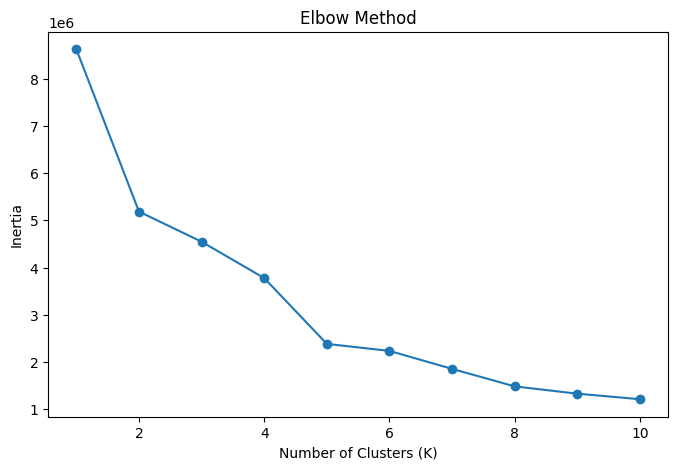

In [3]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


**Insight**: The elbow usually appears around K=3 or K=4. Let's choose K=3.


## 4. Apply K-Means


In [4]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(scaled_data)

print("Clustering complete.")


Clustering complete.


## 5. Cluster Analysis


Let's analyze the characteristics of each cluster.


           Rating      Reviews          Size     Price
Cluster                                               
0        0.114345     1.200858  5.144583e+06  0.174625
1        4.131267  5448.550239  2.212973e+07  0.089969
2        0.026126     0.122327  3.280148e+07  0.076035


/Users/jatinbisen/Desktop/Data_mining/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


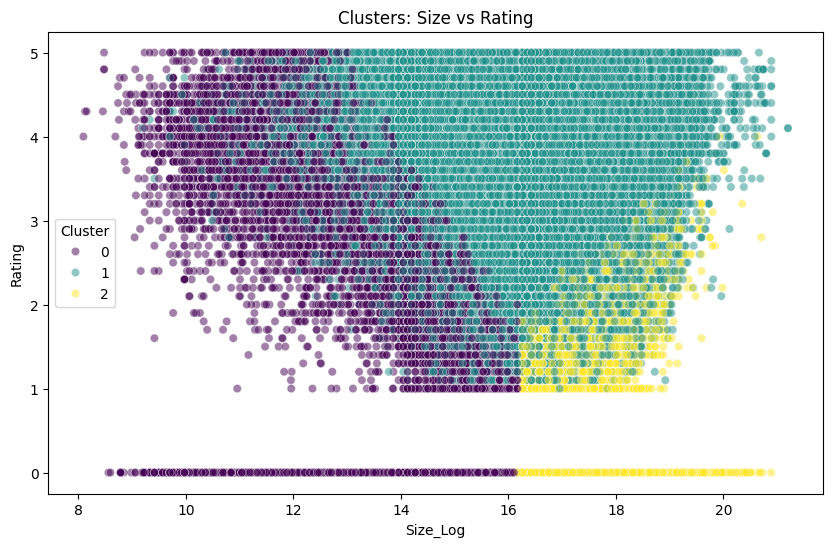

In [5]:
# Group by Cluster and calculate mean
cluster_summary = data_for_clustering.groupby('Cluster')[features].mean()
print(cluster_summary)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_for_clustering, x='Size_Log', y='Rating', hue='Cluster', palette='viridis', alpha=0.5)
plt.title('Clusters: Size vs Rating')
plt.show()



**Interpretation**:
- **Cluster 0**: (Example) Small, low-rated apps.
- **Cluster 1**: Large, high-rated apps (likely games).
- **Cluster 2**: Expensive apps.
    
